<a href="https://colab.research.google.com/github/Khushboo-30gothwal/python/blob/main/deep_learning_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train), (x_test, y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
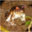

In [4]:
x_train[0]

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[6]

'frog'

In [9]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

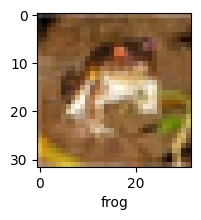

In [10]:
plot_sample(x_train,y_train,0)

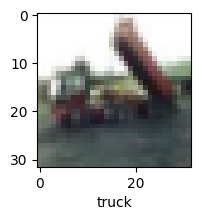

In [11]:
plot_sample(x_train,y_train,2)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
model=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                          layers.Dense(3000,activation='relu'),
                          layers.Dense(1000,activation='relu'),
                          layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 313s 200ms/step - loss: 1.8748 - accuracy: 0.3293
Epoch 2/5
1563/1563 [==============================] - 311s 199ms/step - loss: 1.6598 - accuracy: 0.4043
Epoch 3/5
1563/1563 [==============================] - 335s 215ms/step - loss: 1.5806 - accuracy: 0.4327
Epoch 4/5
1563/1563 [==============================] - 336s 215ms/step - loss: 1.5343 - accuracy: 0.4505
Epoch 5/5
1563/1563 [==============================] - 329s 211ms/step - loss: 1.4927 - accuracy: 0.4643


In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 1.4964 - accuracy: 0.4629


[1.4964429140090942, 0.4629000127315521]

In [16]:
cnn=models.Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),
                       layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),
            layers.Flatten(),
            layers.Dense(64,activation='relu'),
            layers.Dense(10,activation='softmax')])

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 23ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.47      0.62      0.53      1000
           1       0.57      0.63      0.60      1000
           2       0.30      0.45      0.36      1000
           3       0.33      0.31      0.32      1000
           4       0.41      0.27      0.33      1000
           5       0.41      0.30      0.34      1000
           6       0.55      0.41      0.47      1000
           7       0.50      0.57      0.53      1000
           8       0.56      0.60      0.58      1000
           9       0.57      0.47      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



In [18]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4812 - accuracy: 0.4653
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1216 - accuracy: 0.6065
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9923 - accuracy: 0.6528
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9075 - accuracy: 0.6839
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8391 - accuracy: 0.7065
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7865 - accuracy: 0.7262
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7406 - accuracy: 0.7411
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6968 - accuracy: 0.7575
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6601 - accuracy: 0.7698
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [19]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9107 - accuracy: 0.6960


[0.910738468170166, 0.6959999799728394]

In [20]:
y_test=y_test.reshape(-1,)

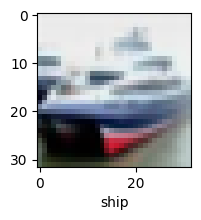

In [21]:
plot_sample(x_test, y_test, 1)

In [22]:
y_predict=cnn.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [23]:
y_predict[:3]

array([[1.3519259e-05, 1.1734138e-05, 4.3198737e-04, 8.0945712e-01,
        3.7136808e-04, 1.7296502e-01, 1.3411910e-02, 5.9485592e-05,
        3.2672042e-03, 1.0728836e-05],
       [6.0066814e-03, 4.7948506e-01, 1.8346214e-05, 6.4974654e-07,
        9.2225611e-07, 4.0014360e-08, 5.6963927e-08, 1.0632895e-06,
        5.0199670e-01, 1.2490515e-02],
       [2.9661733e-01, 2.6887161e-01, 3.5152531e-03, 1.9921788e-03,
        6.2846631e-04, 4.7900196e-04, 3.7762048e-04, 7.7421241e-04,
        2.2176827e-01, 2.0497590e-01]], dtype=float32)

In [24]:
y_class=[np.argmax(element) for element in y_predict]
y_class[:10]

[3, 8, 0, 0, 6, 6, 1, 6, 3, 1]

In [25]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

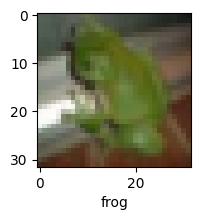

In [26]:
plot_sample(x_test, y_test,7)

In [27]:
classes[y_class[7]]

'frog'

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print("classificstion report: \n", classification_report(y_test, y_class))

classificstion report: 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74      1000
           1       0.79      0.82      0.81      1000
           2       0.61      0.61      0.61      1000
           3       0.55      0.45      0.49      1000
           4       0.62      0.66      0.64      1000
           5       0.65      0.58      0.61      1000
           6       0.73      0.80      0.76      1000
           7       0.75      0.71      0.73      1000
           8       0.82      0.78      0.80      1000
           9       0.65      0.87      0.74      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

